<a href="https://colab.research.google.com/github/antagonisuto/thesis-code/blob/main/10x101xfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run it

In [ ]:
pip install mne

In [ ]:
import os
import numpy as np
import mne

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Visual
import matplotlib.pyplot as plt
from mne.preprocessing import (ICA, corrmap)
from scipy.stats import ttest_rel
from tensorflow.keras import utils as np_utils
from sklearn.utils import shuffle
import seaborn as sns

#CNN
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import keras
from keras import layers

In [ ]:
dataPath = '/content/drive/MyDrive/databbci/data14'

In [ ]:
active_vis = []
passive_vis = []
cue_vis = []

active_au = []
passive_au = []
cue_au = []


for dir in os.listdir(dataPath):
  for filename in os.listdir(os.path.join(dataPath, dir)):
    #if filename.endswith(".vhdr"):
    tmp = os.path.join(os.path.join(dataPath, dir), filename)
      #with open(os.path.join(os.path.join(dataPath, dir), filename), 'r') as f: # open in readonly mode
    # print(filename)
    if filename.endswith("1_active.vhdr"):
      active_vis.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
    elif filename.endswith("1_passive.vhdr"):
      passive_vis.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
    elif filename.endswith("2_cue.vhdr"):
      cue_vis.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))

    elif filename.endswith("3_active.vhdr"):
      active_au.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
    elif filename.endswith("3_passive.vhdr"):
      passive_au.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
    elif filename.endswith("4_cue.vhdr"):
      cue_au.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))

<ipython-input-10-ea2d3398f028>:21: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  cue_vis.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
<ipython-input-10-ea2d3398f028>:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  active_vis.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
<ipython-input-10-ea2d3398f028>:26: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  passive_au.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
<ipython-input-10-ea2d3398f028>:28: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  cue_au.append(mne.io.read_raw_brainvision(tmp, preload=True, verbose=False))
<ipython-input-10-ea2d3398f028>:24: RuntimeWarning: Online software filter detected. Using soft

In [ ]:
print(len(cue_vis), len(cue_au))

14 14


# Function | Run All

    func: raw_to_data(raw, non_active = 0) 
    * active = 0
    * passive = 1
    * cue = 2
    return X, y

\-

    def get_train_test(act, pas, cue): 
    * active[subject] -> act
    * call function "raw_to_data"
    return train_X, test_X, train_y, test_y

\- LDA

  
    def lda_101(train_X, test_X, train_y, test_y):
    return clf, cm

\- CNN

    def cnn_101(train_X, test_X, train_y, test_y):
    * batch_size = 16
    * epochs = 100
    * num_classes = 2
    return cnn_model, cnn_train, test_eval, cm_cnn


\- Visualization

    def vis_confusion_matrix(cm):
    * plot 


## All data load

In [ ]:
def raw_to_data(raw, non_active = 0):
  # raw.pick_channels(['C1', 'Fz', 'C2', 'F3', 'F4', 'Pz', 'Oz', 'C3', 'Cz', 'C4'])
  raw.filter(l_freq=0.4, h_freq=40, fir_design='firwin', verbose=False)
  #raw.filter(l_freq=0.4, h_freq=40, method = 'iir', verbose=False)

  events, _ = mne.events_from_annotations(raw, verbose=False)
  tmin, tmax = -0., 1.  # in s
  baseline = (0, 0)

  #passive -> ignore 
  #cue -> active
  # -> active, ignore
  event_dict = {'active': 1, 'ignore': 2}
  if non_active != 0:
    event_dict.clear()
    if non_active == 1: #passive
      event_dict = {'ignore': 2}
    else: # cue
      event_dict = {'active': 1}
  
  epochs = mne.Epochs(
    raw, events=events,
    event_id=event_dict, tmin=tmin,
    tmax=tmax, baseline=baseline, preload = True, verbose=False)
  # print(epochs.events.size)
  # print(epochs.event_id)
  # {'active': 1, 'ignore': 2}

  #preprocessing
  # filt_raw = raw.copy().filter(l_freq=1., h_freq=None)
  # ica = ICA(n_components=10, max_iter='auto', random_state=97)
  # ica.fit(epochs)

  X = epochs.get_data()*1000  # MEG signals: n_epochs, n_meg_channels, n_times
  y = epochs.events[:, 2]  # target: auditory left vs visual left
  #print(X.shape, y.shape)

  return X, y

## Preprocessing

In [ ]:
def get_train_test(act, pas, cue):
  # subject = 0
  train_X, train_y = raw_to_data(act, 0)
  pas_X, pas_y = raw_to_data(pas, 1) #passive = 1
  cue_X, cue_y = raw_to_data(cue, 2) #ignore = 2

  test_X = np.append(cue_X, pas_X, axis = 0)
  test_y = np.append(cue_y, pas_y, axis = 0)
  # test_X, test_y = shuffle(test_X, test_y, random_state=10)

  # train_X = train_X[:,:,:100]
  # test_X = test_X[:,:,:100]

  # all_data = np.append(train_X, test_X, axis = 0)
  # all_data_labels = np.append(train_y, test_y, axis = 0)

  # train_X, test_X, train_y, test_y = train_test_split(all_data, all_data_labels, test_size=0.2, random_state=42)

  return train_X, test_X, train_y, test_y


In [ ]:
def sgolay2d ( z, window_size, order, derivative=None):
    """
    """
    # number of terms in the polynomial expression
    n_terms = ( order + 1 ) * ( order + 2)  / 2.0
    
    if  window_size % 2 == 0:
        raise ValueError('window_size must be odd')
    
    if window_size**2 < n_terms:
        raise ValueError('order is too high for the window size')

    half_size = window_size // 2
    
    # exponents of the polynomial. 
    # p(x,y) = a0 + a1*x + a2*y + a3*x^2 + a4*y^2 + a5*x*y + ... 
    # this line gives a list of two item tuple. Each tuple contains 
    # the exponents of the k-th term. First element of tuple is for x
    # second element for y.
    # Ex. exps = [(0,0), (1,0), (0,1), (2,0), (1,1), (0,2), ...]
    exps = [ (k-n, n) for k in range(order+1) for n in range(k+1) ]
    
    # coordinates of points
    ind = np.arange(-half_size, half_size+1, dtype=np.float64)
    dx = np.repeat( ind, window_size )
    dy = np.tile( ind, [window_size, 1]).reshape(window_size**2, )

    # build matrix of system of equation
    A = np.empty( (window_size**2, len(exps)) )
    for i, exp in enumerate( exps ):
        A[:,i] = (dx**exp[0]) * (dy**exp[1])
        
    # pad input array with appropriate values at the four borders
    new_shape = z.shape[0] + 2*half_size, z.shape[1] + 2*half_size
    Z = np.zeros( (new_shape) )
    # top band
    band = z[0, :]
    Z[:half_size, half_size:-half_size] =  band -  np.abs( np.flipud( z[1:half_size+1, :] ) - band )
    # bottom band
    band = z[-1, :]
    Z[-half_size:, half_size:-half_size] = band  + np.abs( np.flipud( z[-half_size-1:-1, :] )  -band ) 
    # left band
    band = np.tile( z[:,0].reshape(-1,1), [1,half_size])
    Z[half_size:-half_size, :half_size] = band - np.abs( np.fliplr( z[:, 1:half_size+1] ) - band )
    # right band
    band = np.tile( z[:,-1].reshape(-1,1), [1,half_size] )
    Z[half_size:-half_size, -half_size:] =  band + np.abs( np.fliplr( z[:, -half_size-1:-1] ) - band )
    # central band
    Z[half_size:-half_size, half_size:-half_size] = z
    
    # top left corner
    band = z[0,0]
    Z[:half_size,:half_size] = band - np.abs( np.flipud(np.fliplr(z[1:half_size+1,1:half_size+1]) ) - band )
    # bottom right corner
    band = z[-1,-1]
    Z[-half_size:,-half_size:] = band + np.abs( np.flipud(np.fliplr(z[-half_size-1:-1,-half_size-1:-1]) ) - band ) 
    
    # top right corner
    band = Z[half_size,-half_size:]
    Z[:half_size,-half_size:] = band - np.abs( np.flipud(Z[half_size+1:2*half_size+1,-half_size:]) - band ) 
    # bottom left corner
    band = Z[-half_size:,half_size].reshape(-1,1)
    Z[-half_size:,:half_size] = band - np.abs( np.fliplr(Z[-half_size:, half_size+1:2*half_size+1]) - band ) 
    
    # solve system and convolve
    if derivative == None:
        m = np.linalg.pinv(A)[0].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, m, mode='valid')
    elif derivative == 'col':
        c = np.linalg.pinv(A)[1].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, -c, mode='valid')        
    elif derivative == 'row':
        r = np.linalg.pinv(A)[2].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, -r, mode='valid')        
    elif derivative == 'both':
        c = np.linalg.pinv(A)[1].reshape((window_size, -1))
        r = np.linalg.pinv(A)[2].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, -r, mode='valid'), scipy.signal.fftconvolve(Z, -c, mode='valid')

In [ ]:
def encoder(X_train, X_test, y_train, y_test):
  # number of input columns
  # n_inputs = X_train.shape[1]
  # split into train test sets
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  # scale data
  # t = MinMaxScaler()
  # t.fit(X_train)
  # X_train = t.transform(X_train)
  # X_test = t.transform(X_test)
  # define encoder
  # visible = Input(shape=(n_inputs, 101))
  # encoder level 1

  input = keras.Input(shape=(10, 100, 1))

  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  # x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

  # at this point the representation is (4, 4, 8) i.e. 128-dimensional

  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  # x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  decoded = layers.Conv2D(1, (3, 1), activation='sigmoid')(x)
  autoencoder = keras.Model(input, decoded)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  # # output layer
  # output = Dense(n_inputs, activation='linear')(d)
  # # define autoencoder model
  # model = Model(inputs=visible, outputs=output)
  # # compile autoencoder model
  # model.compile(optimizer='adam', loss='mse')
  # # plot the autoencoder
  plot_model(autoencoder, 'autoencoder_compress.png', show_shapes=True)
  return autoencoder

## LDA Function

In [ ]:
def lda_101(train_X, test_X, train_y, test_y):
  n = train_X.shape[0]
  train_lda = train_X.reshape(n,-1)
  n = test_X.shape[0]
  test_lda = test_X.reshape(n, -1)

  clf = LDA()
  clf.fit(train_lda, train_y)

  y_pred = clf.predict(test_lda)
  cm = confusion_matrix(test_y, y_pred)
  print(cm)
  print('Accuracy' + str(accuracy_score(test_y, y_pred)))

  return clf, cm

## CNN Functions

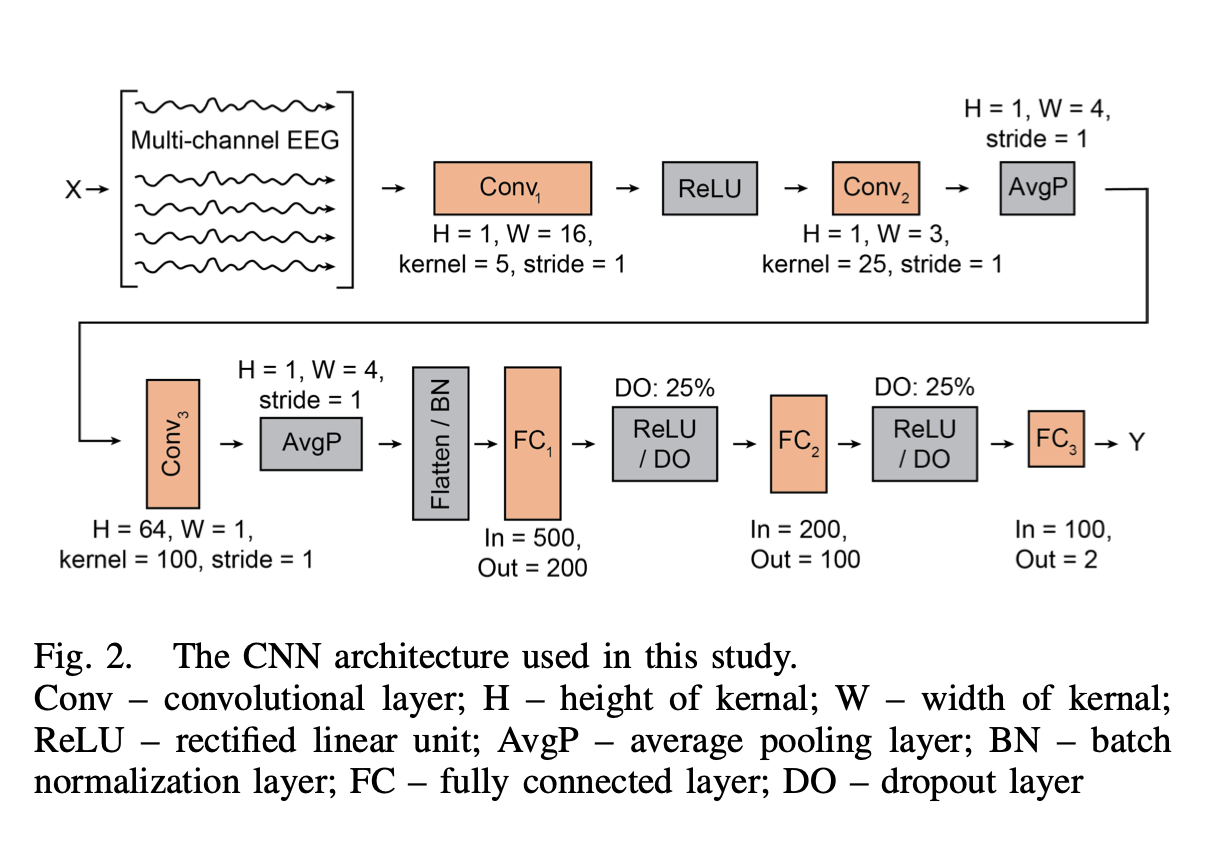

In [ ]:
def cnn_ieee(train_X, test_X, train_y, test_y, batch_size = 32, epochs = 100, ver = 1):
  train_X = train_X.reshape(-1, 32,101, 1)
  test_X = test_X.reshape(-1, 32,101, 1)

  #train_X, train_y = shuffle(test_X, test_y, random_state=2)
  #test_X, test_y = shuffle(test_X, test_y, random_state=2)
  
  train_X,valid_X,train_label,valid_label = train_test_split(train_X, 
                                                             train_y, 
                                                             test_size=0.2, 
                                                             random_state=13)

  train_label_categorical = np_utils.to_categorical(train_label-1)
  valid_label_categorical = np_utils.to_categorical(valid_label-1)
  test_y = np_utils.to_categorical(test_y-1)
  # batch_size = 32
  # epochs = 100
  num_classes = 2

  cnn_model = Sequential()
  cnn_model.add(Conv2D(5, kernel_size=(1, 16),activation='relu', input_shape=(32,101,1),padding='same'))
  # cnn_model.add(MaxPooling2D((2, 2),padding='same'))
  # cnn_model.add(BatchNormalization())
  # cnn_model.add(Dropout(0.25))

  cnn_model.add(Conv2D(25, (1, 3), activation='relu',padding='same'))
  cnn_model.add(AveragePooling2D(pool_size=(1, 4)))
  # cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  # cnn_model.add(BatchNormalization())
  # cnn_model.add(Dropout(0.25))

  cnn_model.add(Conv2D(100, (1, 4), activation='relu',padding='same'))         
  # cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  # cnn_model.add(BatchNormalization())
  # cnn_model.add(Dropout(0.25))

  cnn_model.add(Flatten())
  cnn_model.add(BatchNormalization())
  cnn_model.add(Dense(200, activation='relu'))
  cnn_model.add(Dropout(0.25))

  cnn_model.add(Dense(100, activation='relu'))
  cnn_model.add(Dropout(0.25))
  cnn_model.add(Dense(num_classes, activation='sigmoid'))

  # set a valid path for your system to record model checkpoints
  checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                               save_best_only=True)
  
  y_integers = np.argmax(train_label_categorical, axis=1)
  class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
  d_class_weights = dict(enumerate(class_weights))

  # opt = SGD(lr=0.0001)
  opt = Adam(lr=0.0001, decay=0.01)

  cnn_model.compile(optimizer=opt,
          loss = "categorical_crossentropy",
          metrics=['accuracy'])
  
  cnn_train = cnn_model.fit(train_X, train_label_categorical, batch_size=batch_size, 
                          epochs=epochs,
                          verbose=ver,
                          validation_data=(valid_X, valid_label_categorical), 
                          callbacks=[checkpointer], 
                          class_weight = d_class_weights
                          )

  test_eval = cnn_model.evaluate(test_X, test_y, verbose=0)

  pred_prob_conv = cnn_model.predict(test_X)

  pred_y_conv = np.argmax(pred_prob_conv, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
  test_y_conv = np.argmax(test_y, axis=1)

  cm_cnn = cm_cnn = metrics.confusion_matrix(y_true=test_y_conv, 
                                              y_pred=pred_y_conv)

  return cnn_model, cnn_train, test_eval, cm_cnn


In [ ]:
def cnn(model, train_X, test_X, train_y, test_y, batch_size = 32, epochs = 100, ver = 1):
  train_X = train_X.reshape(-1, 32,101, 1)
  test_X = test_X.reshape(-1, 32,101, 1)

  #train_X, train_y = shuffle(test_X, test_y, random_state=2)
  #test_X, test_y = shuffle(test_X, test_y, random_state=2)
  
  train_X,valid_X,train_label,valid_label = train_test_split(train_X, 
                                                             train_y, 
                                                             test_size=0.2, 
                                                             random_state=13)

  train_label_categorical = np_utils.to_categorical(train_label-1)
  valid_label_categorical = np_utils.to_categorical(valid_label-1)
  test_y = np_utils.to_categorical(test_y-1)
  # batch_size = 32
  # epochs = 100
  num_classes = 2

  # set a valid path for your system to record model checkpoints
  # checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                              #  save_best_only=True)
  
  y_integers = np.argmax(train_label_categorical, axis=1)
  class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
  d_class_weights = dict(enumerate(class_weights))

  opt = SGD(lr=0.01)
  # opt = Adam(lr=0.0001, decay=0.01)

  model.compile(optimizer=opt,
          loss = "categorical_crossentropy",
          metrics=['accuracy'])
  
  cnn_train = model.fit(train_X, train_label_categorical, batch_size=batch_size, 
                          epochs=epochs,
                          verbose=ver,
                          validation_data=(valid_X, valid_label_categorical), 
                          # callbacks=[checkpointer], 
                          class_weight = d_class_weights
                          )

  test_eval = model.evaluate(test_X, test_y, verbose=0)

  pred_prob_conv = model.predict(test_X)

  pred_y_conv = np.argmax(pred_prob_conv, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
  test_y_conv = np.argmax(test_y, axis=1)

  cm_cnn = cm_cnn = metrics.confusion_matrix(y_true=test_y_conv, 
                                              y_pred=pred_y_conv)

  return cnn_model, cnn_train, test_eval, cm_cnn


## AlexNet

In [ ]:
def AlexNet():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(10,4), strides=(1,1), activation='relu', input_shape=(32,101,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(10,4), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(5,2), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(5,2), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(5,2), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
  ])
  return model


## GoogleNet

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate
# https://medium.com/mlearning-ai/implementation-of-googlenet-on-keras-d9873aeed83c
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (2,2), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (2,4), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((2,2), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer


def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (10, 101, 1))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (2,4), strides = 1, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (2,2), strides = 1)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (2,4), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (2,2), strides = 1)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (2,2), strides = 1)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (1,4), strides = 1)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(2, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (1,4), strides = 1)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(2, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (2,2), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(2, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [ ]:
def get_model(name):
  if name == "alexnet":
    model = AlexNet()

  if name == "googlenet":
    model = GoogLeNet()

  # if name == "desnet":
  #   print("okay")

  # if name == "enet":
  #   print("okay")
  
  return model

In [ ]:
def cnn_101(train_X, test_X, train_y, test_y, batch_size = 32, epochs = 100):
  train_X = train_X.reshape(-1, 10,101, 1)
  test_X = test_X.reshape(-1, 10,101, 1)

  #train_X, train_y = shuffle(test_X, test_y, random_state=2)
  #test_X, test_y = shuffle(test_X, test_y, random_state=2)
  
  train_X,valid_X,train_label,valid_label = train_test_split(train_X, 
                                                             train_y, 
                                                             test_size=0.2, 
                                                             random_state=13)

  train_label_categorical = np_utils.to_categorical(train_label-1)
  valid_label_categorical = np_utils.to_categorical(valid_label-1)
  test_y = np_utils.to_categorical(test_y-1)
  # batch_size = 32
  # epochs = 100
  num_classes = 2

  cnn_model = Sequential()
  cnn_model.add(Conv2D(8, kernel_size=(40, 4),activation='relu',input_shape=(10,101,1),padding='same'))
  # cnn_model.add(MaxPooling2D((2, 2),padding='same'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Dropout(0.25))

  cnn_model.add(Conv2D(16, (80, 4), activation='relu',padding='same'))
  # cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Dropout(0.25))

  cnn_model.add(Conv2D(32, (80, 4), activation='relu',padding='same'))         
  # cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Dropout(0.25))

  cnn_model.add(Flatten())
  cnn_model.add(Dense(128, activation='relu'))
  cnn_model.add(Dense(num_classes, activation='sigmoid'))

  # set a valid path for your system to record model checkpoints
  checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                               save_best_only=True)
  
  y_integers = np.argmax(train_label_categorical, axis=1)
  class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
  d_class_weights = dict(enumerate(class_weights))

  opt = SGD(lr=0.01)
  #opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)

  cnn_model.compile(optimizer=opt,
          loss = "categorical_crossentropy",
          metrics=['accuracy'])
  
  cnn_train = cnn_model.fit(train_X, train_label_categorical, batch_size=batch_size, 
                          epochs=epochs,
                          verbose=1,
                          validation_data=(valid_X, valid_label_categorical), 
                          callbacks=[checkpointer], 
                          class_weight = d_class_weights
                          )

  test_eval = cnn_model.evaluate(test_X, test_y, verbose=0)

  pred_prob_conv = cnn_model.predict(test_X)

  pred_y_conv = np.argmax(pred_prob_conv, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
  test_y_conv = np.argmax(test_y, axis=1)

  cm_cnn = cm_cnn = metrics.confusion_matrix(y_true=test_y_conv, 
                                              y_pred=pred_y_conv)

  return cnn_model, cnn_train, test_eval, cm_cnn


In [ ]:
def vis_acc_loss(cnn_train):
  accuracy = cnn_train.history['accuracy']
  val_accuracy = cnn_train.history['val_accuracy']
  loss = cnn_train.history['loss']
  val_loss = cnn_train.history['val_loss']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

## Visualization Functions

In [ ]:
def vis_confusion_matrix(cm):


  ax = sns.heatmap(cm, annot=True, 
            fmt='', cmap='Blues')
  
  # group_counts = ["{0:0.0f}".format(value) for value in
  #                 confusion_matrix.flatten()]

  # labels = [f"{v1}\n" for v1 in zip(group_counts)]

  # labels = np.asarray(labels).reshape(2,2)
  
  ax.set_title('CNN Confusion Matrix \n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['NI','AC'])
  ax.yaxis.set_ticklabels(['NI','AC'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()


# Test | All Subjects

In [ ]:
cnn_models = []
lda_models = []

## Test: LDA & CNN | Subject 1

In [ ]:
subject = 0

train_X, test_X, train_y, test_y = get_train_test(active[subject], passive[subject], cue[subject])

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 1.7s.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 0.4s.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.2s.


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


LDA

[[45 43]
 [31 45]]
Accuracy0.5487804878048781


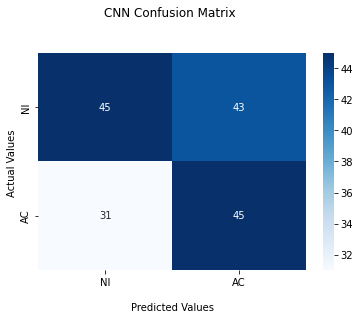

In [ ]:
clf_lda, cm_lda = lda_101(train_X, test_X, train_y, test_y) 
lda_models.append(clf_lda)
vis_confusion_matrix(cm_lda)

CNN

In [ ]:
cnn_model, cnn_train, test_eval, cm_cnn = cnn_ieee(train_X, 
                                                  test_X, 
                                                  train_y, 
                                                  test_y,
                                                  batch_size = 64,
                                                  epochs = 100)

cnn_models.append(cnn_model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.5882
Epoch 1: val_loss improved from inf to 0.69090, saving model to /tmp/checkpoint.h5
8/8 [==============================] - 2s 205ms/step - loss: 0.6767 - accuracy: 0.5882 - val_loss: 0.6909 - val_accuracy: 0.6548
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.6335 - accuracy: 0.7386
Epoch 2: val_loss improved from 0.69090 to 0.68648, saving model to /tmp/checkpoint.h5
8/8 [==============================] - 1s 172ms/step - loss: 0.6335 - accuracy: 0.7386 - val_loss: 0.6865 - val_accuracy: 0.6447
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.5900 - accuracy: 0.7603
Epoch 3: val_loss improved from 0.68648 to 0.67799, saving model to /tmp/checkpoint.h5
8/8 [==============================] - 1s 172ms/step - loss: 0.5900 - accuracy: 0.7603 - val_loss: 0.6780 - val_accuracy: 0.6497
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.5381 - accuracy: 0.8

In [ ]:
cnn_model.save("cnn_model_1.h5py")

INFO:tensorflow:Assets written to: cnn_model_1.h5py/assets


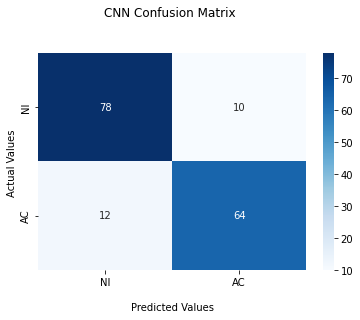

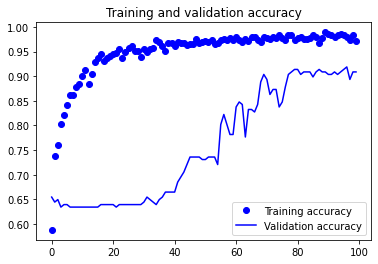

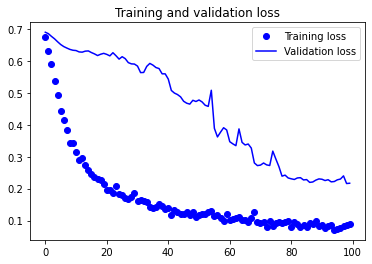

In [ ]:
vis_confusion_matrix(cm_cnn)

vis_acc_loss(cnn_train)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.32752278447151184
Test accuracy: 0.8658536672592163


With Autoencoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import scipy

scalers = {}
for i in range(train_X.shape[1]):
  scalers[i] = MinMaxScaler()
  # train_X[:, i, :] = sgolay2d(train_X[:, i, :], window_size=29, order=0)
  train_X[:, i, :] = scalers[i].fit_transform(train_X[:, i, :]) 

for i in range(test_X.shape[1]):
  # test_X[:, i, :] = sgolay2d(test_X[:, i, :], window_size=29, order=0)
  test_X[:, i, :] = scalers[i].transform(test_X[:, i, :]) 

from keras.callbacks import TensorBoard

train_X = train_X.reshape(-1, 10,100, 1)
test_X = test_X.reshape(-1, 10,100, 1)


en = encoder(train_X, test_X, train_y, test_y)

en.fit(train_X, train_X,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(test_X, test_X))
en.save('/content/drive/MyDrive/databbci/encoder.h5')

train_X_predict = en.predict(train_X).reshape(-1, 10, 100)
test_X_predict = en.predict(test_X).reshape(-1, 10, 100)
train_X_predict.shape, test_X_predict.shape

Epoch 1/50
11/11 [==============================] - 2s 97ms/step - loss: 0.6942 - val_loss: 0.6915
Epoch 2/50
11/11 [==============================] - 1s 83ms/step - loss: 0.6908 - val_loss: 0.6894
Epoch 3/50
11/11 [==============================] - 1s 82ms/step - loss: 0.6880 - val_loss: 0.6847
Epoch 4/50
11/11 [==============================] - 1s 83ms/step - loss: 0.6778 - val_loss: 0.6603
Epoch 5/50
11/11 [==============================] - 1s 83ms/step - loss: 0.6499 - val_loss: 0.6437
Epoch 6/50
11/11 [==============================] - 1s 81ms/step - loss: 0.6437 - val_loss: 0.6427
Epoch 7/50
11/11 [==============================] - 1s 83ms/step - loss: 0.6410 - val_loss: 0.6398
Epoch 8/50
11/11 [==============================] - 1s 82ms/step - loss: 0.6381 - val_loss: 0.6370
Epoch 9/50
11/11 [==============================] - 1s 82ms/step - loss: 0.6358 - val_loss: 0.6352
Epoch 10/50
11/11 [==============================] - 1s 81ms/step - loss: 0.6336 - val_loss: 0.6322
Epoch 11/

((656, 10, 100), (164, 10, 100))

[[56 32]
 [29 47]]
Accuracy0.6280487804878049


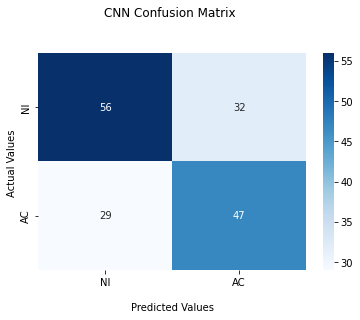

In [ ]:
clf_lda, cm_lda = lda_101(train_X_predict, test_X_predict, train_y, test_y) 
lda_models.append(clf_lda)
vis_confusion_matrix(cm_lda)

In [ ]:
cnn_model_tune, cnn_train_tune, test_eval_tune, cm_cnn_tune = cnn_ieee(train_X_predict, 
                                                                      test_X_predict, 
                                                                      train_y, 
                                                                      test_y,
                                                                      batch_size = 32,
                                                                      epochs = 100)

cnn_models.append(cnn_model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.6231
Epoch 1: val_loss improved from inf to 0.69262, saving model to /tmp/checkpoint.h5
15/15 [==============================] - 4s 201ms/step - loss: 0.6711 - accuracy: 0.6231 - val_loss: 0.6926 - val_accuracy: 0.5076
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.6213 - accuracy: 0.6667
Epoch 2: val_loss improved from 0.69262 to 0.68659, saving model to /tmp/checkpoint.h5
15/15 [==============================] - 2s 114ms/step - loss: 0.6213 - accuracy: 0.6667 - val_loss: 0.6866 - val_accuracy: 0.6447
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.5843 - accuracy: 0.7211
Epoch 3: val_loss improved from 0.68659 to 0.68501, saving model to /tmp/checkpoint.h5
15/15 [==============================] - 2s 117ms/step - loss: 0.5843 - accuracy: 0.7211 - val_loss: 0.6850 - val_accuracy: 0.6497
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.5598 -

In [ ]:
print('Test loss:', test_eval_tune[0])
print('Test accuracy:', test_eval_tune[1])

Test loss: 0.5995848774909973
Test accuracy: 0.707317054271698


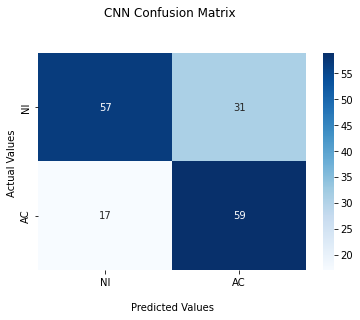

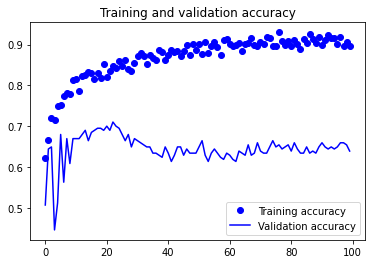

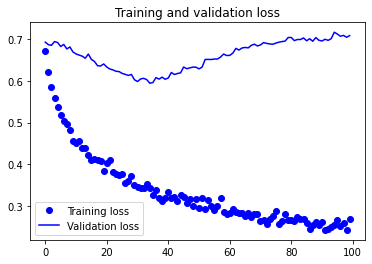

In [ ]:
vis_confusion_matrix(cm_cnn_tune)

vis_acc_loss(cnn_train_tune)

## LDA & CNN | Subject 2

In [ ]:
subject = 1

train_X, test_X, train_y, test_y = get_train_test(active[subject], passive[subject], cue[subject])

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 1.8s.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 0.5s.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 0.9s.


In [ ]:
from collections import Counter
print(Counter(train_y))
print(Counter(test_y))

Counter({1: 372, 2: 284})
Counter({1: 88, 2: 76})


No handles with labels found to put in legend.


1


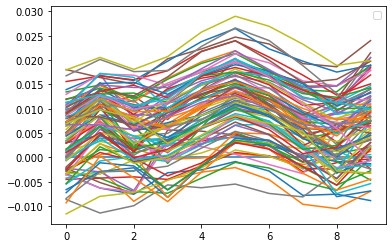

In [ ]:
n = 10
print(train_y[n])
plt.plot(train_X[n,:,:])
plt.legend()
plt.show()

[[48 40]
 [36 40]]
Accuracy0.5365853658536586


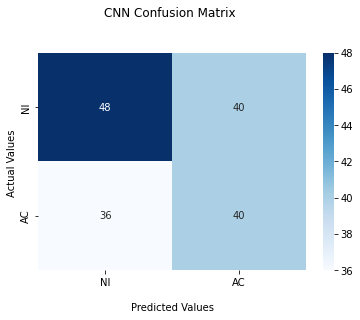

In [ ]:
clf_lda, cm_lda = lda_101(train_X, test_X, train_y, test_y) 
lda_models.append(clf_lda)
vis_confusion_matrix(cm_lda)

In [ ]:
cnn_model, cnn_train, test_eval, cm_cnn = cnn_ieee(train_X, 
                                                  test_X, 
                                                  train_y, 
                                                  test_y,
                                                  28,
                                                  epochs = 100)

cnn_models.append(cnn_model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - ETA: 0s - loss: 0.7959 - accuracy: 0.5839
Epoch 1: val_loss improved from inf to 0.71531, saving model to /tmp/checkpoint.h5
17/17 [==============================] - 4s 168ms/step - loss: 0.7959 - accuracy: 0.5839 - val_loss: 0.7153 - val_accuracy: 0.3756
Epoch 2/100
17/17 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.6231
Epoch 2: val_loss improved from 0.71531 to 0.71503, saving model to /tmp/checkpoint.h5
17/17 [==============================] - 2s 108ms/step - loss: 0.7037 - accuracy: 0.6231 - val_loss: 0.7150 - val_accuracy: 0.3655
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.6471
Epoch 3: val_loss improved from 0.71503 to 0.68394, saving model to /tmp/checkpoint.h5
17/17 [==============================] - 2s 113ms/step - loss: 0.6662 - accuracy: 0.6471 - val_loss: 0.6839 - val_accuracy: 0.6548
Epoch 4/100
17/17 [==============================] - ETA: 0s - loss: 0.6240 -

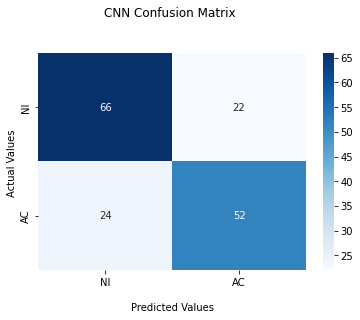

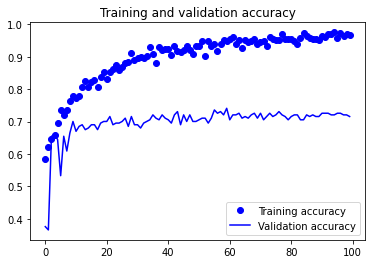

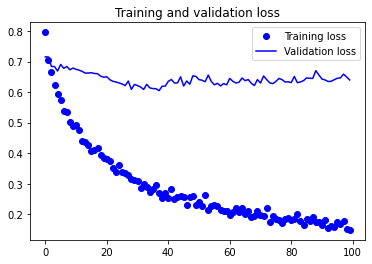

In [ ]:
vis_confusion_matrix(cm_cnn)

vis_acc_loss(cnn_train)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6839898228645325
Test accuracy: 0.7195122241973877


With Autoencoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import scipy

scalers = {}
for i in range(train_X.shape[1]):
  scalers[i] = MinMaxScaler()
  # train_X[:, i, :] = sgolay2d(train_X[:, i, :], window_size=29, order=0)
  train_X[:, i, :] = scalers[i].fit_transform(train_X[:, i, :]) 

for i in range(test_X.shape[1]):
  # test_X[:, i, :] = sgolay2d(test_X[:, i, :], window_size=29, order=0)
  test_X[:, i, :] = scalers[i].transform(test_X[:, i, :]) 

In [ ]:
from keras.callbacks import TensorBoard

train_X = train_X.reshape(-1, 10,100, 1)
test_X = test_X.reshape(-1, 10,100, 1)


en = encoder(train_X, test_X, train_y, test_y)

en.fit(train_X, train_X,
                epochs=50,
                batch_size=len(train_X),
                shuffle=True,
                validation_data=(test_X, test_X))
# en.save('/content/drive/MyDrive/databbci/encoder.h5')

train_X_predict = en.predict(train_X).reshape(-1, 10, 100)
test_X_predict = en.predict(test_X).reshape(-1, 10, 100)
train_X_predict.shape, test_X_predict.shape

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6926 - val_loss: 0.6922
Epoch 2/50
1/1 [==============================] - 1s 775ms/step - loss: 0.6918 - val_loss: 0.6916
Epoch 3/50
1/1 [==============================] - 1s 786ms/step - loss: 0.6911 - val_loss: 0.6911
Epoch 4/50
1/1 [==============================] - 1s 783ms/step - loss: 0.6904 - val_loss: 0.6907
Epoch 5/50
1/1 [==============================] - 1s 806ms/step - loss: 0.6898 - val_loss: 0.6903
Epoch 6/50
1/1 [==============================] - 1s 766ms/step - loss: 0.6891 - val_loss: 0.6899
Epoch 7/50
1/1 [==============================] - 1s 773ms/step - loss: 0.6885 - val_loss: 0.6897
Epoch 8/50
1/1 [==============================] - 1s 772ms/step - loss: 0.6880 - val_loss: 0.6895
Epoch 9/50
1/1 [==============================] - 1s 780ms/step - loss: 0.6875 - val_loss: 0.6894
Epoch 10/50
1/1 [==============================] - 1s 766ms/step - loss: 0.6871 - val_loss: 0.6893
Epoch 11/50
1/1 [=====

((656, 10, 100), (164, 10, 100))

No handles with labels found to put in legend.


1


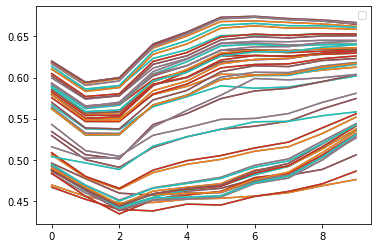

In [ ]:
n = 10
print(train_y[n])
plt.plot(train_X_predict[n,:,:])
plt.legend()
plt.show()

[[48 40]
 [42 34]]
Accuracy0.5


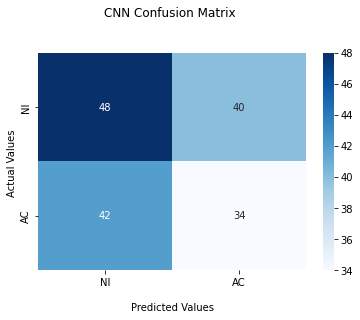

In [ ]:
clf_lda, cm_lda = lda_101(train_X_predict, test_X_predict, train_y, test_y) 
lda_models.append(clf_lda)
vis_confusion_matrix(cm_lda)

In [ ]:
cnn_model_tune, cnn_train_tune, test_eval_tune, cm_cnn_tune = cnn_ieee(train_X_predict, 
                                                                      test_X_predict, 
                                                                      train_y, 
                                                                      test_y,
                                                                      30,
                                                                      epochs = 100)

cnn_models.append(cnn_model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - ETA: 0s - loss: 0.7494 - accuracy: 0.5926
Epoch 1: val_loss improved from inf to 0.68893, saving model to /tmp/checkpoint.h5
16/16 [==============================] - 3s 131ms/step - loss: 0.7494 - accuracy: 0.5926 - val_loss: 0.6889 - val_accuracy: 0.6650
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 0.7226 - accuracy: 0.5664
Epoch 2: val_loss improved from 0.68893 to 0.68432, saving model to /tmp/checkpoint.h5
16/16 [==============================] - 2s 108ms/step - loss: 0.7226 - accuracy: 0.5664 - val_loss: 0.6843 - val_accuracy: 0.6599
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 0.6969 - accuracy: 0.5817
Epoch 3: val_loss improved from 0.68432 to 0.66513, saving model to /tmp/checkpoint.h5
16/16 [==============================] - 2s 108ms/step - loss: 0.6969 - accuracy: 0.5817 - val_loss: 0.6651 - val_accuracy: 0.6345
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 0.6649 -

In [ ]:
cnn_model.save("'/content/drive/MyDrive/databbci/cnn_model_2.h5py")

INFO:tensorflow:Assets written to: cnn_model_2.h5py/assets


In [ ]:
tmp = test_X[1].reshape(10,100,1)
print(tmp.shape)
print(cnn_model.predict(test_X, batch_size=124))
print(test_y[0])

(10, 100, 1)
[[0.5403531  0.48561817]
 [0.5415746  0.4909963 ]
 [0.54061717 0.48333442]
 [0.51923364 0.46938333]
 [0.49795803 0.4612712 ]
 [0.50289845 0.4622757 ]
 [0.49072927 0.4576956 ]
 [0.4907297  0.46066827]
 [0.4796159  0.46966064]
 [0.46928328 0.48880368]
 [0.48206773 0.49015945]
 [0.4714606  0.47603628]
 [0.4992634  0.50201756]
 [0.4876756  0.49893892]
 [0.47816068 0.512499  ]
 [0.4670898  0.4734745 ]
 [0.46107566 0.4848306 ]
 [0.46641317 0.4629807 ]
 [0.4763867  0.4868711 ]
 [0.49037626 0.4872207 ]
 [0.49332973 0.48633417]
 [0.49477106 0.4879439 ]
 [0.47194052 0.48111084]
 [0.49485743 0.48671135]
 [0.47714233 0.48078015]
 [0.48231283 0.4811642 ]
 [0.465384   0.48133934]
 [0.45366398 0.47529218]
 [0.46342173 0.47402674]
 [0.4692192  0.4685071 ]
 [0.48368755 0.47206348]
 [0.4961835  0.4802755 ]
 [0.49994567 0.4803313 ]
 [0.49847975 0.48588938]
 [0.49607497 0.4817906 ]
 [0.49901068 0.48632705]
 [0.49504697 0.5025257 ]
 [0.5014696  0.48324454]
 [0.49272567 0.48644996]
 [0.4971585 

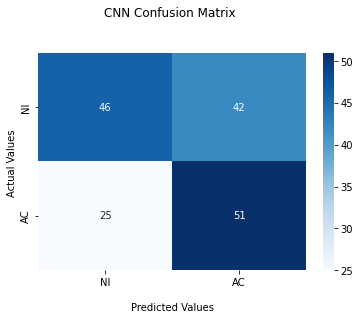

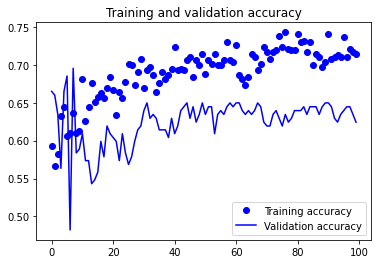

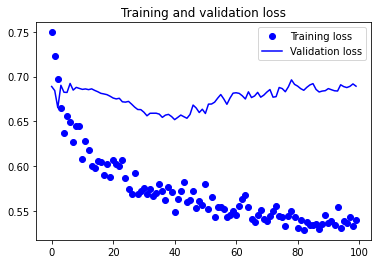

In [ ]:
vis_confusion_matrix(cm_cnn_tune)

vis_acc_loss(cnn_train_tune)

In [ ]:
print('Test loss:', test_eval_tune[0])
print('Test accuracy:', test_eval_tune[1])

Test loss: 0.658076286315918
Test accuracy: 0.5914633870124817


## Test 3: LDA & CNN | Subject 3

In [ ]:
subject = 2

train_X, test_X, train_y, test_y = get_train_test(active[subject], passive[subject], cue[subject])

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 1.1s.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 0.6s.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 331 samples (3.310 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components


<ipython-input-5-9e9bb564ee4f>:32: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Fitting ICA took 0.3s.


[[53 40]
 [34 31]]
Accuracy0.5316455696202531


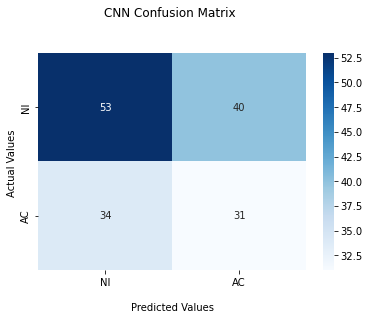

In [ ]:
clf_lda, cm_lda = lda_101(train_X, test_X, train_y, test_y) 
lda_models.append(clf_lda)
vis_confusion_matrix(cm_lda)

In [ ]:
cnn_model, cnn_train, test_eval, cm_cnn = cnn_ieee(train_X, 
                                                  test_X, 
                                                  train_y, 
                                                  test_y, 124 , 100)

cnn_models.append(cnn_model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/5 [=======================>......] - ETA: 0s - loss: 0.5551 - accuracy: 0.6673
Epoch 1: val_loss improved from inf to 0.63215, saving model to /tmp/checkpoint.h5
5/5 [==============================] - 2s 295ms/step - loss: 0.5537 - accuracy: 0.6693 - val_loss: 0.6321 - val_accuracy: 0.5906
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.4590 - accuracy: 0.7545
Epoch 2: val_loss improved from 0.63215 to 0.62342, saving model to /tmp/checkpoint.h5
5/5 [==============================] - 1s 254ms/step - loss: 0.4590 - accuracy: 0.7545 - val_loss: 0.6234 - val_accuracy: 0.5906
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.8198
Epoch 3: val_loss did not improve from 0.62342
5/5 [==============================] - 1s 218ms/step - loss: 0.4446 - accuracy: 0.8198 - val_loss: 0.6236 - val_accuracy: 0.5906
Epoch 4/100
4/5 [=======================>......] - ETA: 0s - loss: 0.4070 - accuracy: 0.8286
Epoch 4: val_loss improved from 0.62

In [ ]:
cnn_model.save("/content/drive/MyDrive/databbci/cnn_model_3_90.h5py")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/databbci/cnn_model_3_90.h5py/assets


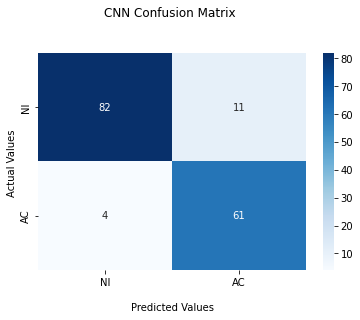

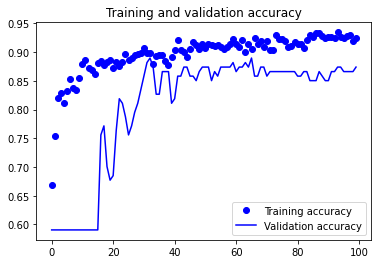

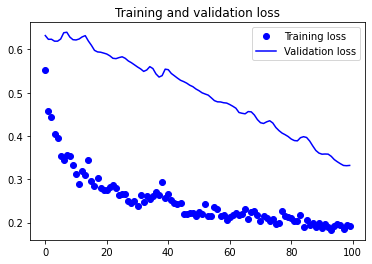

In [ ]:
vis_confusion_matrix(cm_cnn)

vis_acc_loss(cnn_train)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.30953121185302734
Test accuracy: 0.905063271522522


With autoencoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import scipy

scalers = {}
for i in range(train_X.shape[1]):
  scalers[i] = MinMaxScaler()
  # train_X[:, i, :] = sgolay2d(train_X[:, i, :], window_size=29, order=0)
  train_X[:, i, :] = scalers[i].fit_transform(train_X[:, i, :]) 

for i in range(test_X.shape[1]):
  # test_X[:, i, :] = sgolay2d(test_X[:, i, :], window_size=29, order=0)
  test_X[:, i, :] = scalers[i].transform(test_X[:, i, :]) 

from keras.callbacks import TensorBoard

train_X = train_X.reshape(-1, 10,100, 1)
test_X = test_X.reshape(-1, 10,100, 1)


en = encoder(train_X, test_X, train_y, test_y)

en.fit(train_X, train_X,
                epochs=50,
                batch_size=len(train_X),
                shuffle=True,
                validation_data=(test_X, test_X))
en.save('/content/drive/MyDrive/databbci/encoder.h5')

train_X_predict = en.predict(train_X).reshape(-1, 10, 100)
test_X_predict = en.predict(test_X).reshape(-1, 10, 100)
train_X_predict.shape, test_X_predict.shape

Epoch 1/50
5/5 [==============================] - 2s 207ms/step - loss: 0.6871 - val_loss: 0.6801
Epoch 2/50
5/5 [==============================] - 1s 170ms/step - loss: 0.6746 - val_loss: 0.6725
Epoch 3/50
5/5 [==============================] - 1s 175ms/step - loss: 0.6724 - val_loss: 0.6725
Epoch 4/50
5/5 [==============================] - 1s 192ms/step - loss: 0.6700 - val_loss: 0.6713
Epoch 5/50
5/5 [==============================] - 1s 192ms/step - loss: 0.6701 - val_loss: 0.6704
Epoch 6/50
5/5 [==============================] - 1s 172ms/step - loss: 0.6686 - val_loss: 0.6696
Epoch 7/50
5/5 [==============================] - 1s 169ms/step - loss: 0.6677 - val_loss: 0.6682
Epoch 8/50
5/5 [==============================] - 1s 170ms/step - loss: 0.6665 - val_loss: 0.6671
Epoch 9/50
5/5 [==============================] - 1s 171ms/step - loss: 0.6652 - val_loss: 0.6657
Epoch 10/50
5/5 [==============================] - 1s 172ms/step - loss: 0.6635 - val_loss: 0.6637
Epoch 11/50
5/5 [==

((632, 10, 100), (158, 10, 100))

[[58 35]
 [17 48]]
Accuracy0.6708860759493671


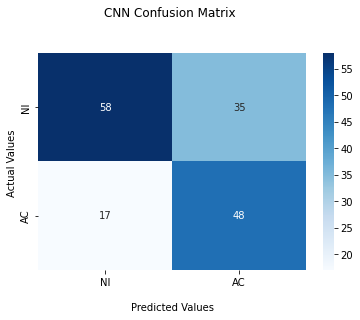

In [ ]:
clf_lda, cm_lda = lda_101(train_X_predict, test_X_predict, train_y, test_y) 
lda_models.append(clf_lda)
vis_confusion_matrix(cm_lda)

No handles with labels found to put in legend.


1


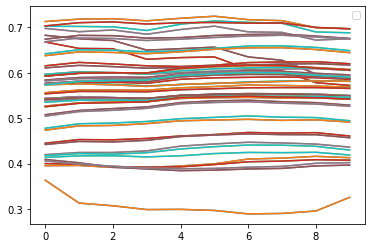

In [ ]:
n = 100
print(train_y[n])
plt.plot(train_X_predict[n,:,:])
plt.legend()
plt.show()

In [ ]:
cnn_model_tune, cnn_train_tune, test_eval_tune, cm_cnn_tune = cnn_ieee(train_X_predict, 
                                                                      test_X_predict, 
                                                                      train_y, 
                                                                      test_y, 124 , 100)

cnn_models.append(cnn_model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - ETA: 0s - loss: 0.6364 - accuracy: 0.6059
Epoch 1: val_loss improved from inf to 0.68424, saving model to /tmp/checkpoint.h5
5/5 [==============================] - 2s 344ms/step - loss: 0.6364 - accuracy: 0.6059 - val_loss: 0.6842 - val_accuracy: 0.5906
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.7525
Epoch 2: val_loss improved from 0.68424 to 0.67352, saving model to /tmp/checkpoint.h5
5/5 [==============================] - 1s 280ms/step - loss: 0.5004 - accuracy: 0.7525 - val_loss: 0.6735 - val_accuracy: 0.5906
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.4845 - accuracy: 0.7941
Epoch 3: val_loss improved from 0.67352 to 0.66533, saving model to /tmp/checkpoint.h5
5/5 [==============================] - 1s 271ms/step - loss: 0.4845 - accuracy: 0.7941 - val_loss: 0.6653 - val_accuracy: 0.5906
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.4589 - accuracy: 0.7

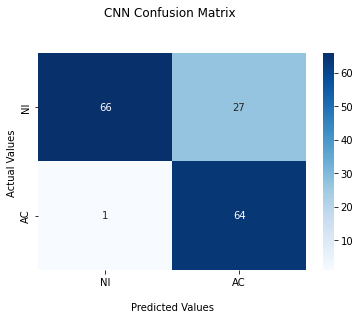

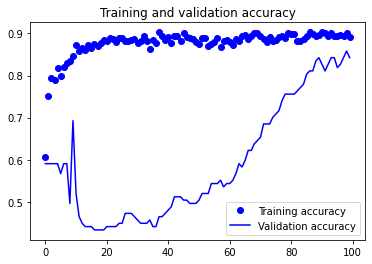

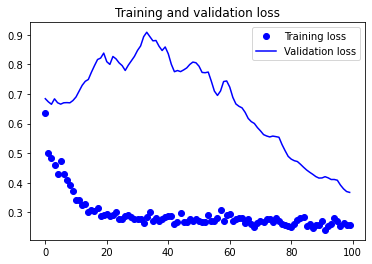

In [ ]:
vis_confusion_matrix(cm_cnn_tune)

vis_acc_loss(cnn_train_tune)

In [ ]:
print('Test loss:', test_eval_tune[0])
print('Test accuracy:', test_eval_tune[1])

Test loss: 0.37530481815338135
Test accuracy: 0.8227847814559937


# All subjects | Auditory

In [ ]:
for i in range(14):
  print('**************************************************')
  print('Subject', i)
  train_X, test_X, train_y, test_y = get_train_test(active_au[i], passive_au[i], cue_au[i])

  # LDA
  clf_lda, cm_lda = lda_101(train_X, test_X, train_y, test_y) 
  vis_confusion_matrix(cm_lda)

  #CNN
  cnn_model, cnn_train, test_eval, cm_cnn = cnn_ieee(train_X, 
                                                  test_X, 
                                                  train_y, 
                                                  test_y,
                                                  batch_size = 64,
                                                  epochs = 100,
                                                  ver = 1)
  
  vis_confusion_matrix(cm_cnn)
  vis_acc_loss(cnn_train)
  print('Test loss:', test_eval[0])
  print('Test accuracy:', test_eval[1])
  print('**************************************************')

In [ ]:
train_X, test_X, train_y, test_y = get_train_test(active_au[i], passive_au[i], cue_au[i])
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(540, 32, 101) (280, 32, 101) (540,) (280,)


**************************************************
Subject 0
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 58s 8s/step - loss: 7.5518 - accuracy: 0.5162 - val_loss: 0.7194 - val_accuracy: 0.3333
Epoch 2/100
7/7 [==============================] - 57s 8s/step - loss: 2.4214 - accuracy: 0.4931 - val_loss: 0.6842 - val_accuracy: 0.6667
Epoch 3/100
7/7 [==============================] - 57s 8s/step - loss: 1.7522 - accuracy: 0.5069 - val_loss: 0.7258 - val_accuracy: 0.3333
Epoch 4/100
7/7 [==============================] - 61s 9s/step - loss: 1.4782 - accuracy: 0.5000 - val_loss: 0.6543 - val_accuracy: 0.6667
Epoch 5/100
7/7 [==============================] - 62s 9s/step - loss: 1.4094 - accuracy: 0.5046 - val_loss: 0.6678 - val_accuracy: 0.6667
Epoch 6/100
7/7 [==============================] - 60s 9s/step - loss: 0.9728 - accuracy: 0.5556 - val_loss: 0.6675 - val_accuracy: 0.6667
Epoch 7/100
7/7 [==============================] - 63s 9s/step - loss: 1.2442 - accuracy: 0.5486 - val_loss: 0.7340 - val_accuracy: 0.3333
Epoch 8/100
7/7 [======================

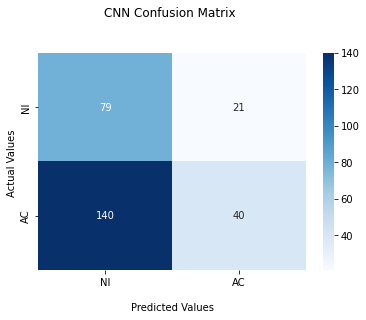

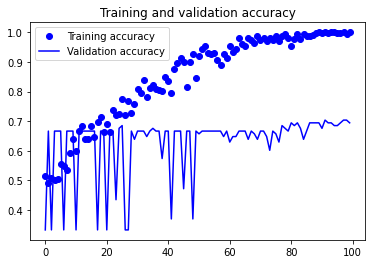

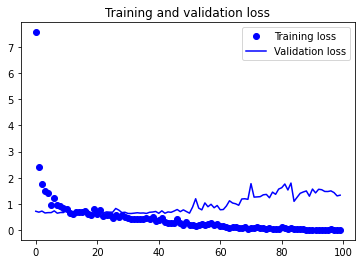

Test loss: 2.616489887237549
Test accuracy: 0.42500001192092896
**************************************************
**************************************************
Subject 1
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 62s 9s/step - loss: 6.4988 - accuracy: 0.5162 - val_loss: 0.6754 - val_accuracy: 0.6759
Epoch 2/100
7/7 [==============================] - 60s 9s/step - loss: 2.1279 - accuracy: 0.5278 - val_loss: 0.7309 - val_accuracy: 0.3241
Epoch 3/100
7/7 [==============================] - 60s 9s/step - loss: 2.0828 - accuracy: 0.5116 - val_loss: 0.6641 - val_accuracy: 0.6759
Epoch 4/100
7/7 [==============================] - 59s 9s/step - loss: 1.8323 - accuracy: 0.5532 - val_loss: 0.6929 - val_accuracy: 0.5833
Epoch 5/100
7/7 [==============================] - 59s 9s/step - loss: 1.4387 - accuracy: 0.5000 - val_loss: 0.6670 - val_accuracy: 0.6759
Epoch 6/100
7/7 [==============================] - 60s 9s/step - loss: 0.9587 - accuracy: 0.5509 - val_loss: 0.6967 - val_accuracy: 0.3241
Epoch 7/100
7/7 [==============================] - 60s 9s/step - loss: 0.9112 - accuracy: 0.5787 - val_loss: 0.8803 - val_accuracy: 0.3241
Epoch 8/100
7/7 [======================

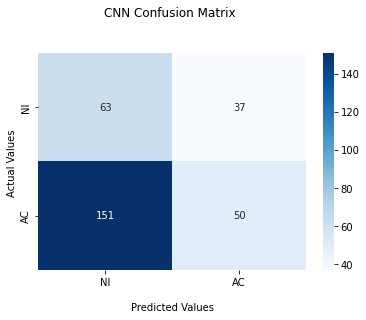

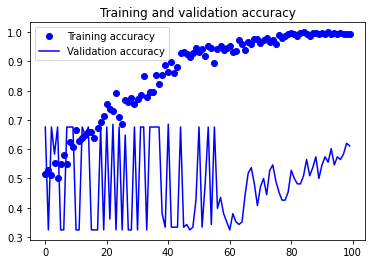

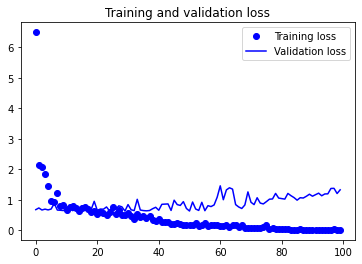

Test loss: 2.294055223464966
Test accuracy: 0.37541529536247253
**************************************************
**************************************************
Subject 2
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 134s 9s/step - loss: 6.4042 - accuracy: 0.5370 - val_loss: 0.6949 - val_accuracy: 0.3148
Epoch 2/100
7/7 [==============================] - 59s 9s/step - loss: 1.8478 - accuracy: 0.5532 - val_loss: 0.7360 - val_accuracy: 0.3426
Epoch 3/100
7/7 [==============================] - 59s 8s/step - loss: 1.6950 - accuracy: 0.5208 - val_loss: 0.7110 - val_accuracy: 0.3426
Epoch 4/100
7/7 [==============================] - 59s 9s/step - loss: 1.7825 - accuracy: 0.5278 - val_loss: 0.6898 - val_accuracy: 0.6667
Epoch 5/100
7/7 [==============================] - 60s 9s/step - loss: 1.2262 - accuracy: 0.6227 - val_loss: 0.7928 - val_accuracy: 0.3426
Epoch 6/100
7/7 [==============================] - 59s 9s/step - loss: 1.1932 - accuracy: 0.5903 - val_loss: 0.7969 - val_accuracy: 0.3426
Epoch 7/100
7/7 [==============================] - 60s 9s/step - loss: 1.4680 - accuracy: 0.5440 - val_loss: 0.8250 - val_accuracy: 0.3426
Epoch 8/100
7/7 [=====================

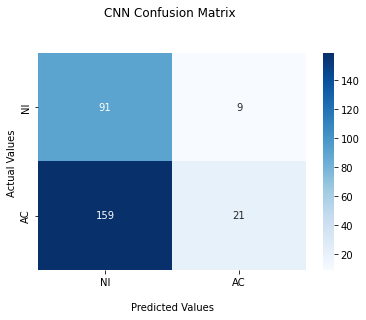

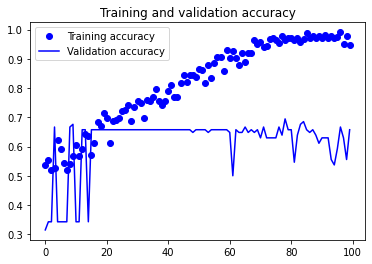

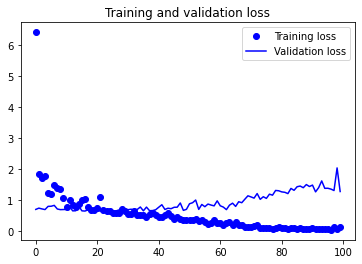

Test loss: 2.4702084064483643
Test accuracy: 0.4000000059604645
**************************************************
**************************************************
Subject 3
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 61s 9s/step - loss: 5.0874 - accuracy: 0.5648 - val_loss: 0.7132 - val_accuracy: 0.3333
Epoch 2/100
7/7 [==============================] - 59s 9s/step - loss: 3.6095 - accuracy: 0.4977 - val_loss: 0.6993 - val_accuracy: 0.3333
Epoch 3/100
7/7 [==============================] - 59s 8s/step - loss: 1.2819 - accuracy: 0.6505 - val_loss: 0.6769 - val_accuracy: 0.6667
Epoch 4/100
7/7 [==============================] - 59s 8s/step - loss: 0.6963 - accuracy: 0.7477 - val_loss: 0.6609 - val_accuracy: 0.6667
Epoch 5/100
7/7 [==============================] - 58s 8s/step - loss: 1.3371 - accuracy: 0.7153 - val_loss: 0.6552 - val_accuracy: 0.6667
Epoch 6/100
7/7 [==============================] - 59s 9s/step - loss: 0.7430 - accuracy: 0.7847 - val_loss: 0.7464 - val_accuracy: 0.3333
Epoch 7/100
7/7 [==============================] - 59s 9s/step - loss: 0.8294 - accuracy: 0.7894 - val_loss: 0.7013 - val_accuracy: 0.3333
Epoch 8/100
7/7 [======================

In [ ]:
for i in range(14):
  print('**************************************************')
  print('Subject', i)
  train_X, test_X, train_y, test_y = get_train_test(active_au[i], passive_au[i], cue_au[i])

  # LDA
  # clf_lda, cm_lda = lda_101(train_X, test_X, train_y, test_y) 
  # vis_confusion_matrix(cm_lda)

  model = get_model("alexnet")

  #CNN
  cnn_model, cnn_train, test_eval, cm_cnn = cnn(model,
                                                train_X,
                                                test_X,
                                                train_y,
                                                test_y,
                                                batch_size = 64,
                                                epochs = 100,
                                                ver = 1)
  
  vis_confusion_matrix(cm_cnn)
  vis_acc_loss(cnn_train)
  print('Test loss:', test_eval[0])
  print('Test accuracy:', test_eval[1])
  print('**************************************************')